# Predicting Diabetes Progression with Regression Analysis

**Author:** Mhamed Maatou

## Section 1. Import and Inspect the Data

In [2]:
# Import libraries
# All imports should be at the top of the notebook
# This cell will be executed when the notebook is loaded

# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import the California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Import the necessary function
from pandas.plotting import scatter_matrix

import statsmodels.api as sm

In [3]:
# Load the diabetes dataset and verify
# URL of the dataset
url = 'https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt'

# Read the data from the URL. Since it's tab-separated, specify sep='\t'
df = pd.read_csv(url, sep='\t')

# Show the first 10 rows and print them
print(df.head(10))

   AGE  SEX   BMI     BP   S1     S2    S3    S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.00  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.00  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.00  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.00  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.00  4.2905  80  135
5   23    1  22.6   89.0  139   64.8  61.0  2.00  4.1897  68   97
6   36    2  22.0   90.0  160   99.6  50.0  3.00  3.9512  82  138
7   66    2  26.2  114.0  255  185.0  56.0  4.55  4.2485  92   63
8   60    2  32.1   83.0  179  119.4  42.0  4.00  4.4773  94  110
9   29    1  30.0   85.0  180   93.4  43.0  4.00  5.3845  88  310


## Section 2 Exploratory Data Analysis (EDA) Techniques
##  Descriptive Statistics

In [4]:
# Python
# Check data types and missing values

print("Data Info:")
df.info()

# Summary statistics
print("Summary Statistics:")
df.describe()
print(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB
Summary Statistics:
              AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     

In [5]:
# Check for missing values in each column
print("Missing values:")
df.isnull().sum()

Missing values:


AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

In [6]:
#checking number of unique values in a column
df['SEX'].value_counts()

SEX
1    235
2    207
Name: count, dtype: int64

## Visualization Techniques
Histograms: Plot histograms for numerical variables such as BMI, BP, S1-S6, and Y to observe their distribution.

Histogram of Y to see if the progression of diabetes follows a normal or skewed distribution.

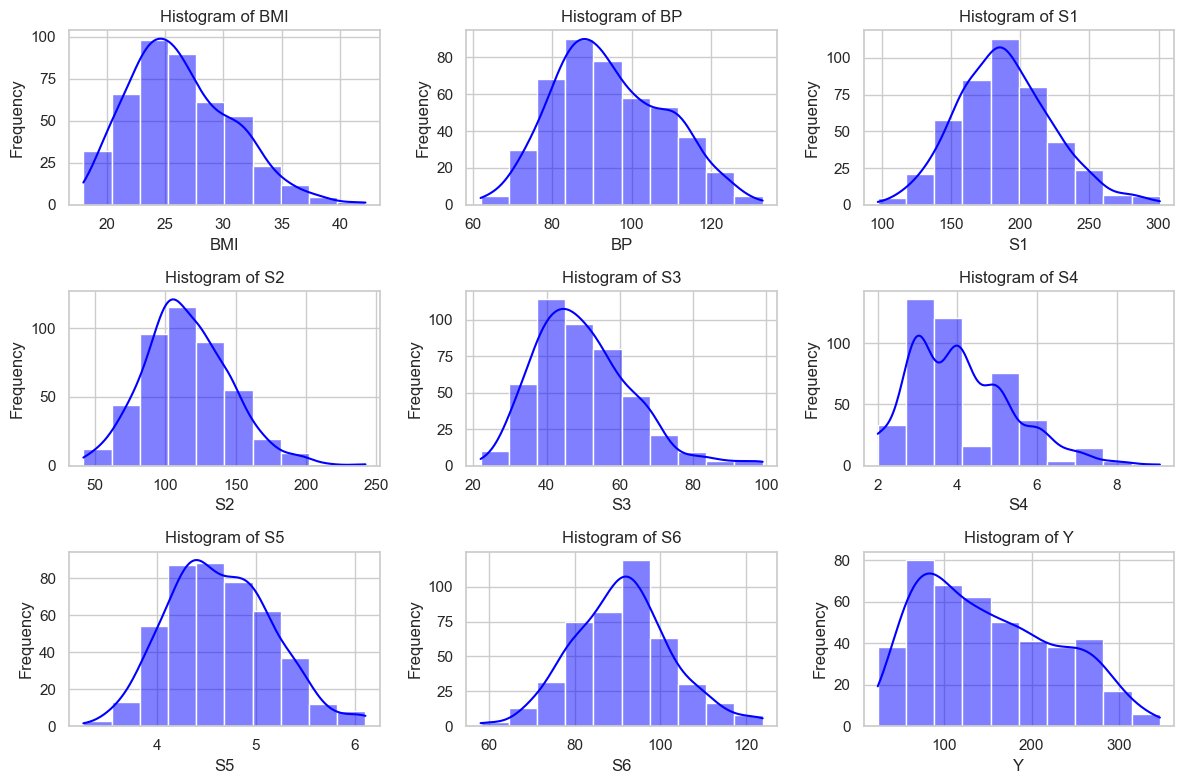

In [7]:
# Visualization Techniques

# Set up the plotting style
sns.set(style="whitegrid")

# List of numerical columns
numerical_cols = ['BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

# Plot histograms for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=10, color='blue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Box Plots: Box plots to identify outliers for BMI, BP, S1-S6, and Y.

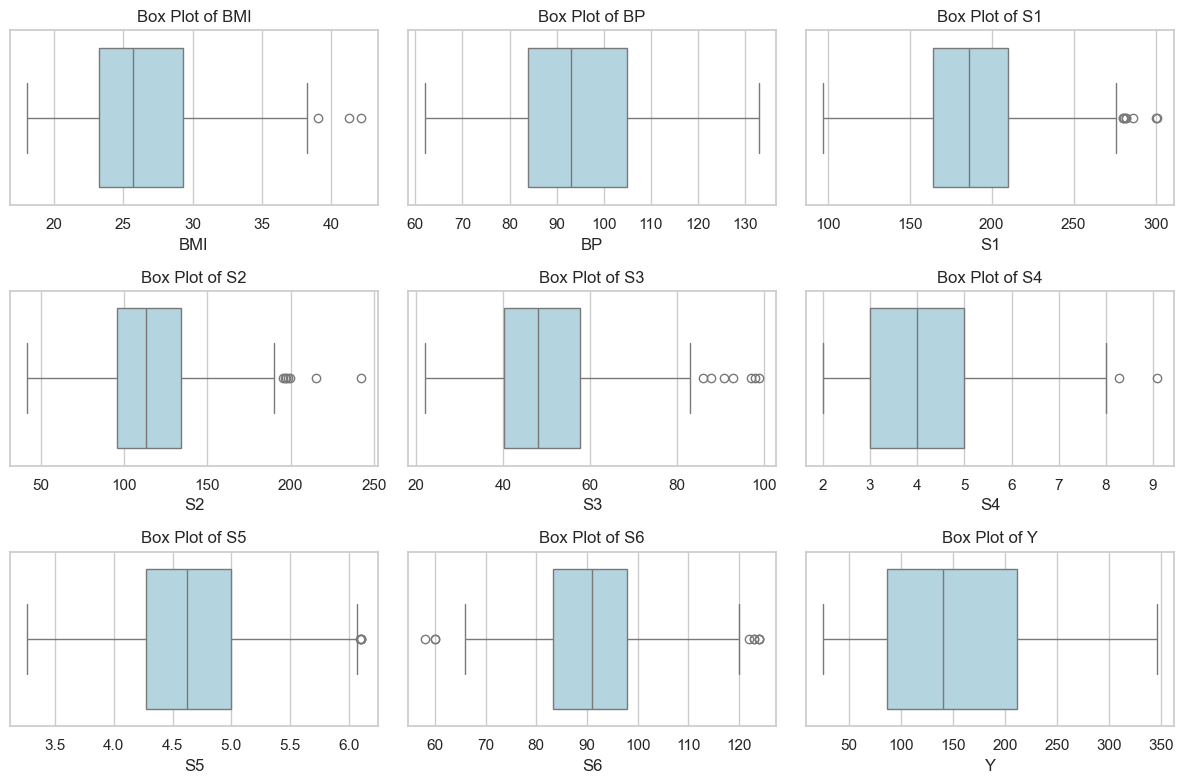

In [8]:
# Set up the plotting style
sns.set(style="whitegrid")

# List of numerical columns to plot
numerical_cols = ['BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

# Create box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## Scatter Plots: Scatter plots between BMI and Y, BP and Y, to visually assess if there's any linear or non-linear relationship.

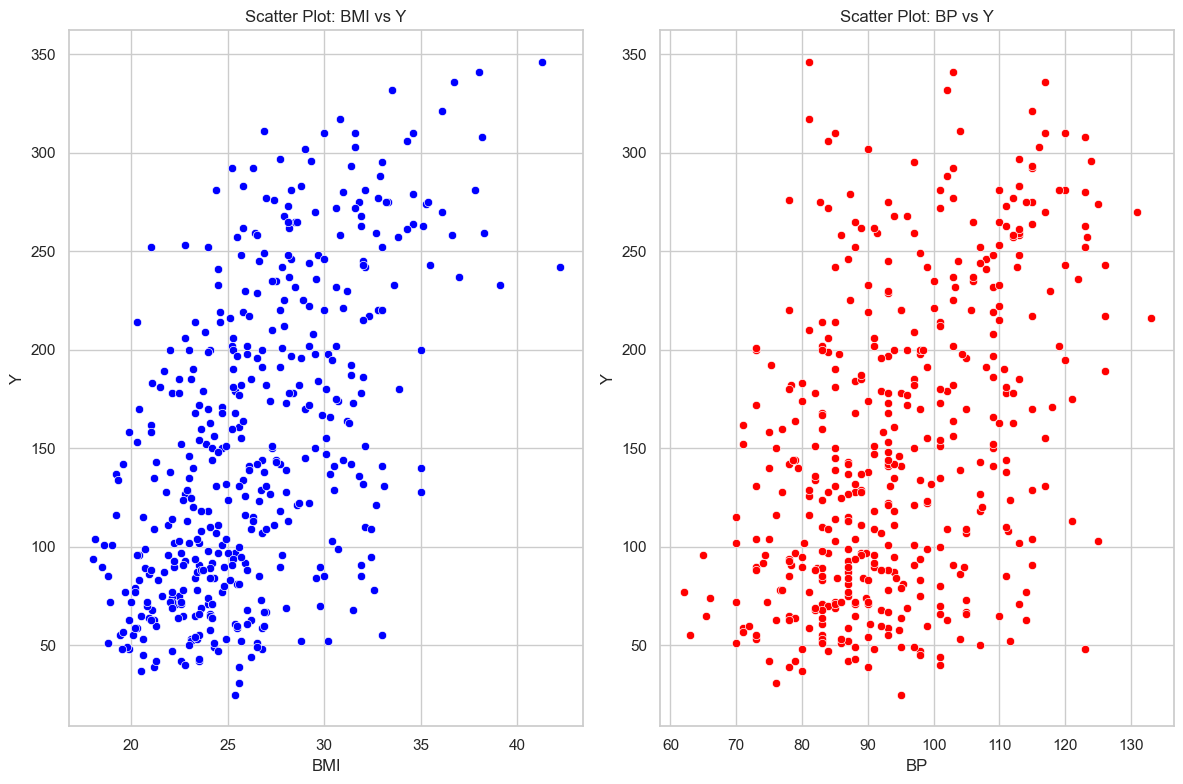

In [9]:
# Set up the plotting style
sns.set(style="whitegrid")

# Create a figure for the scatter plots
plt.figure(figsize=(12, 8))

# Scatter plot between BMI and Y
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['BMI'], y=df['Y'], color='blue')
plt.title('Scatter Plot: BMI vs Y')
plt.xlabel('BMI')
plt.ylabel('Y')

# Scatter plot between BP and Y
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['BP'], y=df['Y'], color='red')
plt.title('Scatter Plot: BP vs Y')
plt.xlabel('BP')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

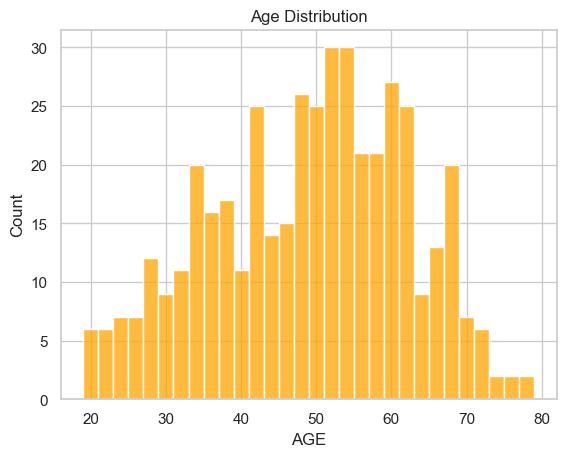

In [10]:
#Age Distribution
sns.histplot(df['AGE'], bins=30, color='orange')
plt.title("Age Distribution")
plt.show()

### Correlation Heatmap:
Plot a heatmap of correlations between all numeric variables, especially between BMI, BP, S1-S6, and Y. This helps identify which features are strongly correlated with the target variable (Y) and with each other.

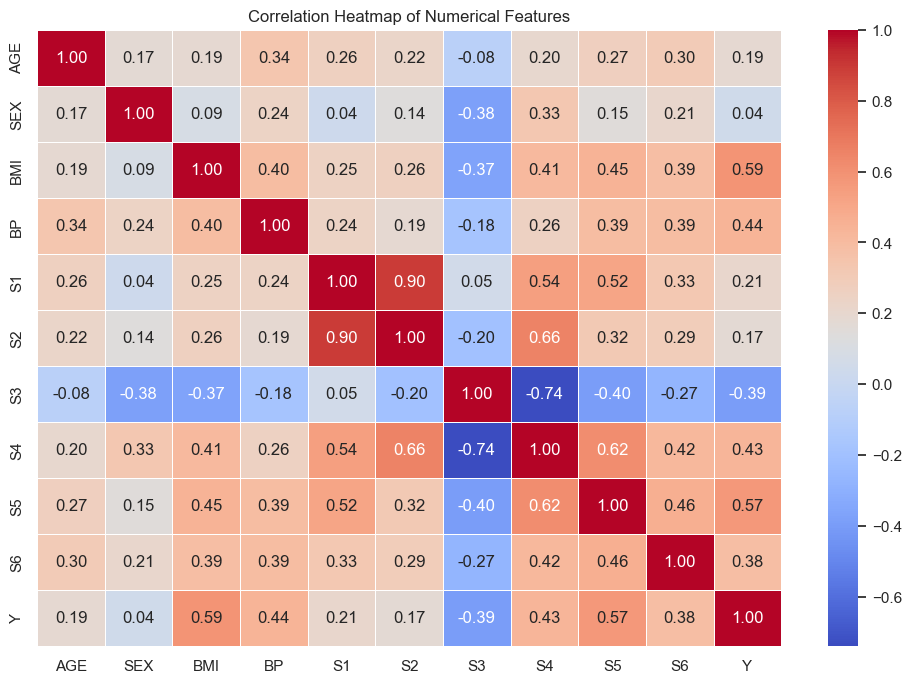

In [11]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the plot size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Numerical Features')

# Show the plot
plt.show()

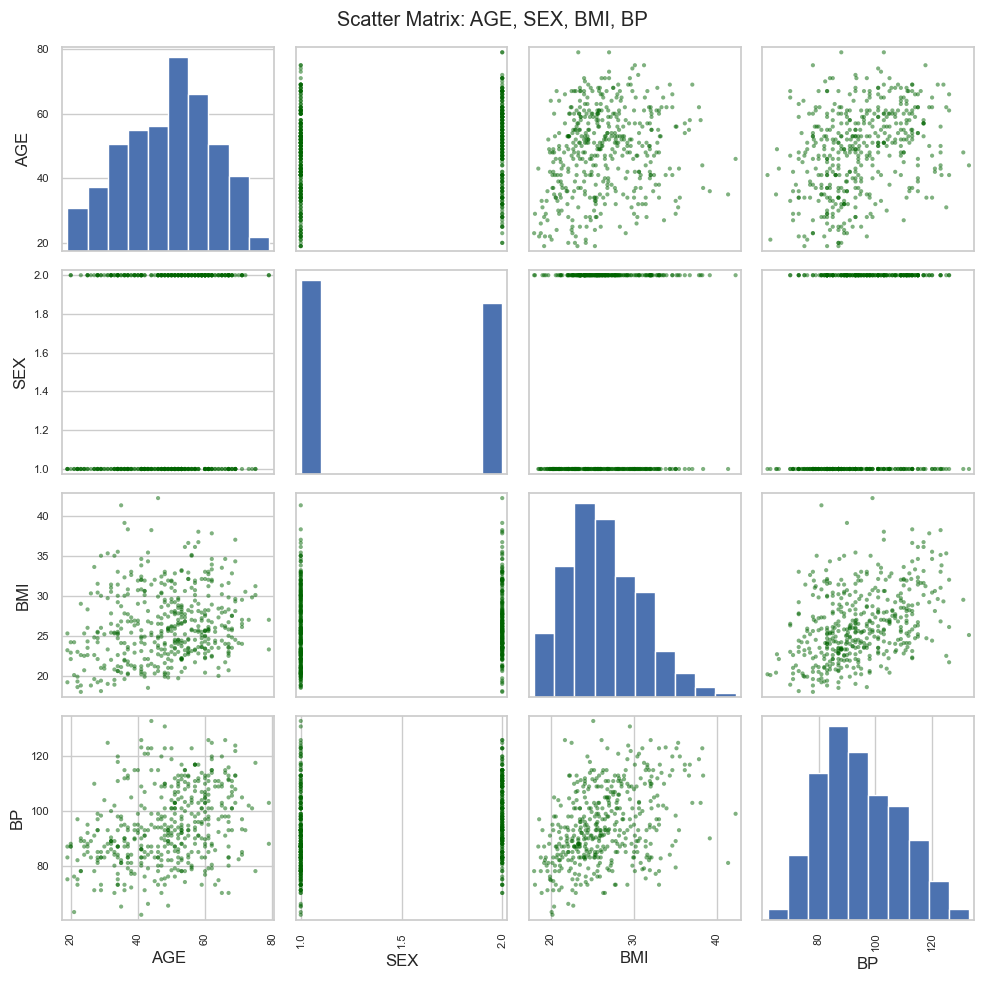

In [12]:
# Select only numeric features
attributes = ['AGE', 'SEX', 'BMI', 'BP']
# Create scatter matrix
scatter_matrix(df[attributes], figsize=(10, 10), color='darkgreen')

# Title
plt.suptitle("Scatter Matrix: AGE, SEX, BMI, BP")
# Show the plot
plt.tight_layout()
plt.show()

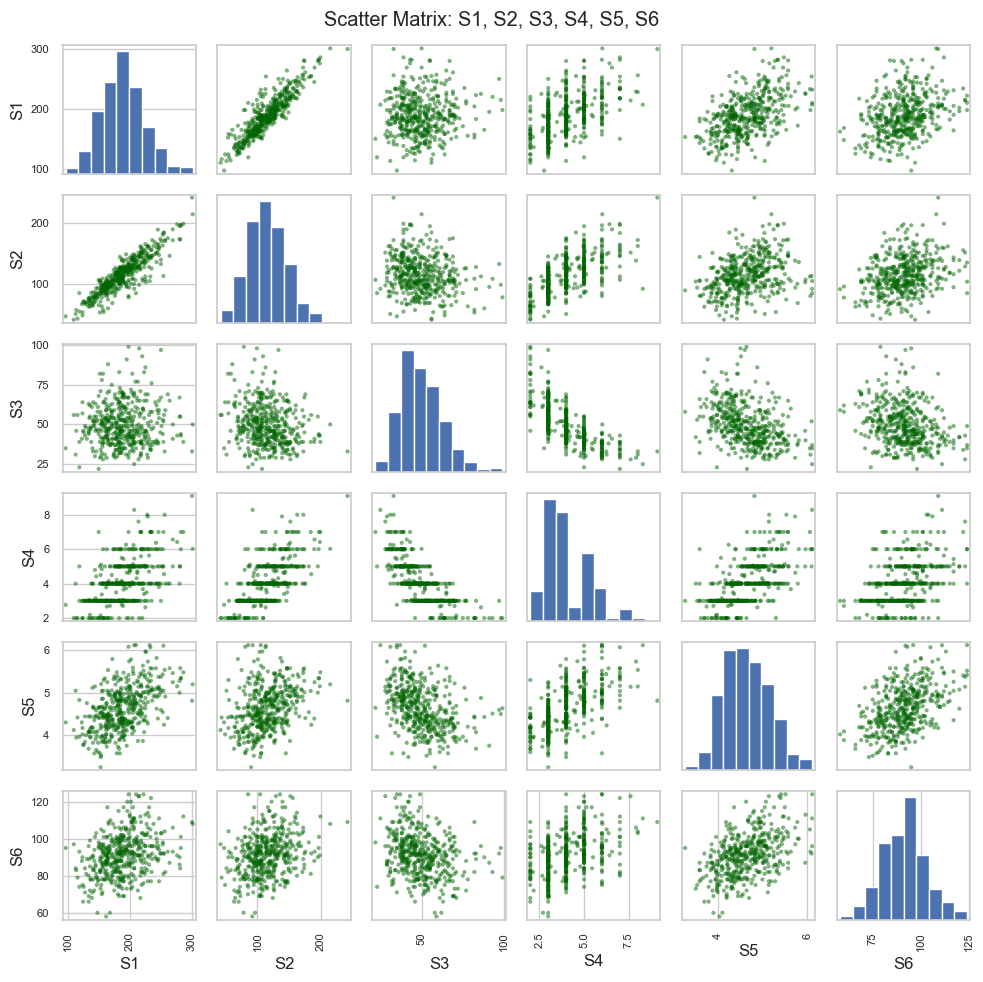

In [13]:
# Select only numeric features
attributes = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6']
# Create scatter matrix
scatter_matrix(df[attributes], figsize=(10, 10), color='darkgreen')

# Title
plt.suptitle("Scatter Matrix: S1, S2, S3, S4, S5, S6")
# Show the plot
plt.tight_layout()
plt.show()

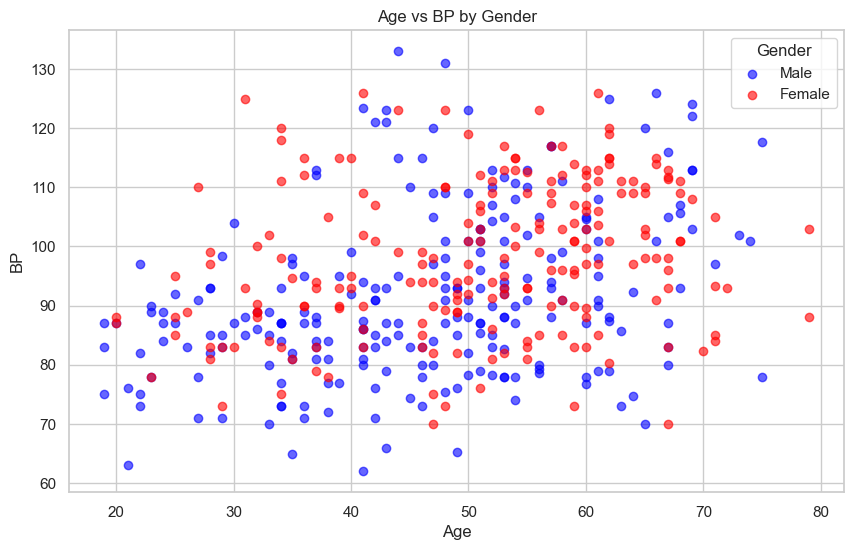

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot for males (SEX == 1)
male_data = df[df['SEX'] == 1]  # Using numeric value for males
plt.scatter(
    male_data['AGE'], 
    male_data['BP'], 
    c='blue', 
    label='Male', 
    alpha=0.6
)

# Plot for females (SEX == 2)
female_data = df[df['SEX'] == 2]  # Using numeric value for females
plt.scatter(
    female_data['AGE'], 
    female_data['BP'], 
    c='red', 
    label='Female', 
    alpha=0.6
)

# Labels and title
plt.xlabel('Age')
plt.ylabel('BP')
plt.title('Age vs BP by Gender')

# Add a legend
plt.legend(title="Gender")

# Add grid
plt.grid(True)

# Show the plot
plt.show()



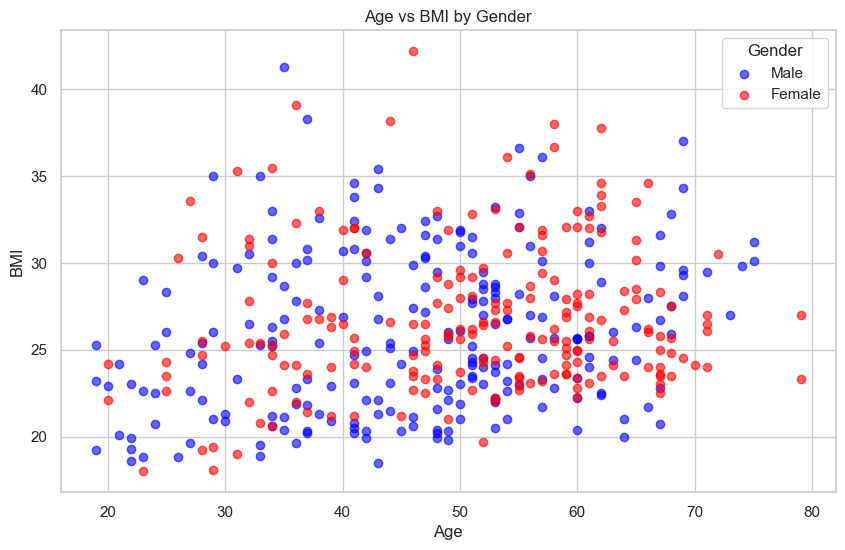

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot for males (SEX == 1)
male_data = df[df['SEX'] == 1]  # Using numeric value for males
plt.scatter(
    male_data['AGE'], 
    male_data['BMI'], 
    c='blue', 
    label='Male', 
    alpha=0.6
)

# Plot for females (SEX == 2)
female_data = df[df['SEX'] == 2]  # Using numeric value for females
plt.scatter(
    female_data['AGE'], 
    female_data['BMI'], 
    c='red', 
    label='Female', 
    alpha=0.6
)

# Labels and title
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI by Gender')

# Add a legend
plt.legend(title="Gender")

# Add grid
plt.grid(True)

# Show the plot
plt.show()

C:\Users\khalo\AppData\Local\Temp\ipykernel_17140\2364401186.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bmi_by_age_sex = df.groupby(['AgeGroup', 'SEX'])['BMI'].mean().unstack()


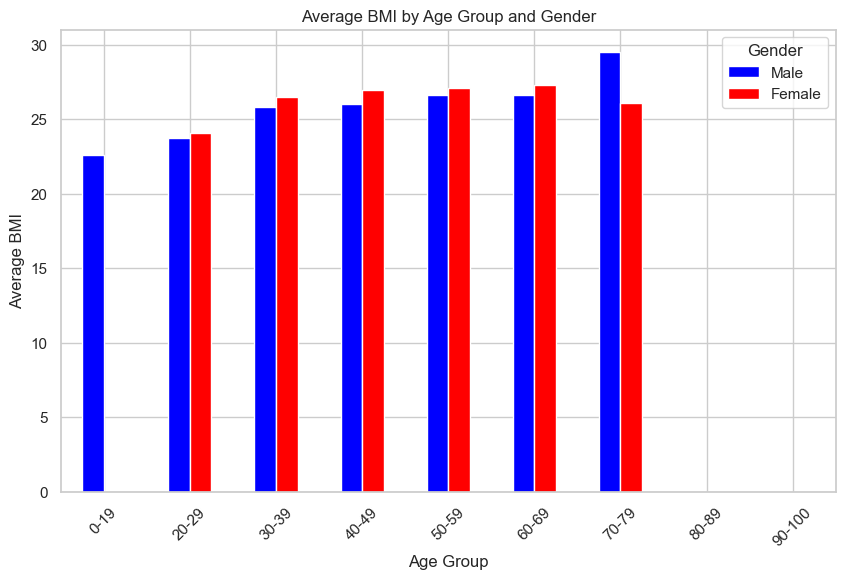

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Create age bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Add a new column for the age group
df['AgeGroup'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

# Calculate average BMI by AgeGroup and SEX
average_bmi_by_age_sex = df.groupby(['AgeGroup', 'SEX'])['BMI'].mean().unstack()

# Plotting the bar chart
average_bmi_by_age_sex.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'])

# Customize labels and title
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.title('Average BMI by Age Group and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Male', 'Female'])

# Add grid
plt.grid(True)

# Show the plot
plt.show()

C:\Users\khalo\AppData\Local\Temp\ipykernel_17140\1229942381.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bp_by_age_sex = df.groupby(['AgeGroup', 'SEX'])['BP'].mean().unstack()


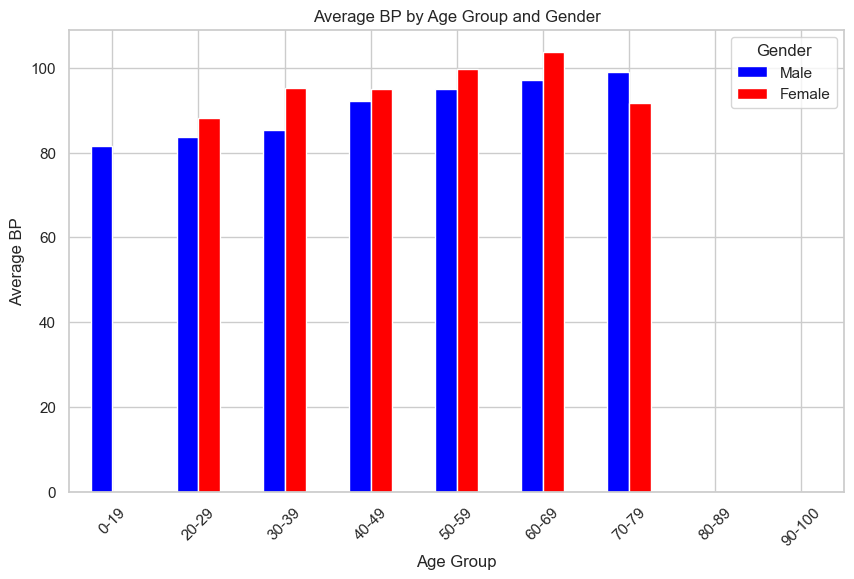

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Create age bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Add a new column for the age group
df['AgeGroup'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

# Calculate average BP by AgeGroup and SEX
average_bp_by_age_sex = df.groupby(['AgeGroup', 'SEX'])['BP'].mean().unstack()

# Plotting the bar chart
average_bp_by_age_sex.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'])

# Customize labels and title
plt.xlabel('Age Group')
plt.ylabel('Average BP')
plt.title('Average BP by Age Group and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Male', 'Female'])

# Add grid
plt.grid(True)

# Show the plot
plt.show()

Feature Selection via Backward Elimination in OLS Regression: We used the backward elimination using Ordinary Least Squares (OLS) regression to build a linear regression model for predicting a target variable 'Y' from a set of features in a dataset (specifically from a CSV file, diabetes.csv). Let’s break it down by purpose and step:

In [19]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load dataset

data = pd.read_csv(r'C:\Projects\Capstone_Project\diabetes.csv')

# Features and target
X = data.drop('Y', axis=1)
y = data['Y']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant (intercept term) to training data
X_train_sm = sm.add_constant(X_train)

# Create a copy of training data for elimination
X_opt = X_train_sm.copy()

# Backward Elimination process
def backward_elimination(X, y, significance_level=0.05):
    iteration = 0
    while True:
        model = sm.OLS(y, X).fit()
        max_pval = model.pvalues.max()
        if max_pval > significance_level:
            excluded_feature = model.pvalues.idxmax()
            print(f"Step {iteration+1}: Removing '{excluded_feature}' with p-value {max_pval:.4f}")
            X = X.drop(columns=excluded_feature)
            iteration += 1
        else:
            print("Final model reached.")
            break
    return X, model

# Apply backward elimination
X_selected, final_model = backward_elimination(X_opt, y_train)

# Summary of final model
print("\n===== FINAL MODEL SUMMARY =====")
print(final_model.summary())

Step 1: Removing 'AGE' with p-value 0.5834
Step 2: Removing 'S3' with p-value 0.4712
Step 3: Removing 'S6' with p-value 0.4527
Step 4: Removing 'S4' with p-value 0.1737
Final model reached.

===== FINAL MODEL SUMMARY =====
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     63.34
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           8.64e-53
Time:                        19:52:49   Log-Likelihood:                -1907.8
No. Observations:                 353   AIC:                             3830.
Df Residuals:                     346   BIC:                             3857.
Df Model:                           6                                         
Covariance Type:            nonrobust                             

### Evaluate on Test Set
We test the performance of the final model on the test set:

In [20]:
# Prepare test set with the selected features (and constant)
X_test_sm = sm.add_constant(X_test[X_selected.columns[1:]])  # skip 'const'
y_pred = final_model.predict(X_test_sm)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R²: {r2:.4f}")

Test MSE: 2846.29
Test R²: 0.4628


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

print(vif_data)

  feature        VIF
0   const  97.861304
1     SEX   1.179129
2     BMI   1.537218
3      BP   1.311474
4      S1   8.922114
5      S2   7.263731
6      S5   2.352675


### Check for Multicollinearity
We use VIF (Variance Inflation Factor) to assess multicollinearity:

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train[X_selected.columns[1:]], y_train)  # Drop the 'const' column

# Predictions
y_pred_lasso = lasso.predict(X_test[X_selected.columns[1:]])

# Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Test MSE: {mse_lasso:.2f}")
print(f"Lasso Test R²: {r2_lasso:.4f}")

Lasso Test MSE: 2846.35
Lasso Test R²: 0.4628


VIF > 5–10 indicates multicollinearity. You might consider dropping or combining features with high VIF.

# Drop 'S1' and 'S2' from the model and rerun backward elimination
X_opt_dropped = X_opt.drop(columns=['S1', 'S2'])
X_selected_dropped, final_model_dropped = backward_elimination(X_opt_dropped, y_train)

We use Regularization (Lasso or Ridge Regression)
Regularization techniques, such as Lasso (which performs feature selection) or Ridge regression, can help handle multicollinearity effectively.

Lasso (L1 Regularization) Example:

In [23]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train[X_selected.columns[1:]], y_train)  # Drop the 'const' column

# Predictions
y_pred_lasso = lasso.predict(X_test[X_selected.columns[1:]])

# Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Test MSE: {mse_lasso:.2f}")
print(f"Lasso Test R²: {r2_lasso:.4f}")

Lasso Test MSE: 2846.35
Lasso Test R²: 0.4628


Ridge (L2 Regularization) Example:

In [24]:
from sklearn.linear_model import Ridge

# Ridge model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train[X_selected.columns[1:]], y_train)  # Drop the 'const' column

# Predictions
y_pred_ridge = ridge.predict(X_test[X_selected.columns[1:]])

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Test MSE: {mse_ridge:.2f}")
print(f"Ridge Test R²: {r2_ridge:.4f}")

Ridge Test MSE: 2847.31
Ridge Test R²: 0.4626
